In [1]:
import plotly.express as px
import numpy as np
import pandas as pd

In [2]:
import Sim as sim
from sim.Sim_Part import src_part


jig1 = sim.Jig("Jig 1")
sim.BufferSource("SRC1", 10, 45, parent=jig1, getNextPart=sim.src_part("VB"))

buf = sim.RotBuffer("Buff", 3, 5, 5)

rob1 = sim.Rob("Robbie 1")
sim.RobHandling("Einlagern", jig1, buf, 5, 23, 5, parent=rob1)

jig2 = sim.Jig("Übergabe")
sim.BufferDrain(
    "Drain",
    62,
    parent=jig2,
)


rob2 = sim.Rob("Robbie 2")
sim.RobHandling("Auslagern", buf, jig2, 5, 56, 5, parent=rob2, take_from_position=3)

In [3]:
sim.core.run(0, 500)

In [4]:

data = sim.core.getHistoryDf()

In [5]:
data["duration"] = data["end"] - data["start"]
whos = list(data["who"].unique())
what = [x for x in data["action"].unique() if not x.isnumeric()]
data["y"] = [whos.index(x) for x in data["who"]]

In [35]:
[data[data["y"]==x]["action"].values[0].isnumeric() for x in range(len(whos))]


[True, False, True, True, False, True, False]

In [33]:
mins = {}
maxs = {}
for y, who in zip(range(len(whos)), whos):
    if data[data["y"]==y]["action"].values[0].isnumeric():
        mins.update({y:min(data[data["y"]==y]["action"].astype(int))})
        maxs.update({y:max(data[data["y"]==y]["action"].astype(int))})

In [41]:
plot_x = []
plot_y = []
plot_texts = []
plot_tags = []
margin = 0.5
for s, e, y, a in zip(data["start"], data["end"], data["y"], data["action"]):
    plot_x.extend([s, e, None])
    if a.isnumeric():
        val = (int(a)-mins[y])/(maxs[y]-mins[y])
        y = y+(val-0.5)*margin
        plot_y.extend([y, y, None])
        plot_texts.extend([a, "", ""])
        plot_tags.extend(["numeric", "numeric", "numeric"])
    else:
        plot_y.extend([y, y, None])
        plot_texts.extend([str(e-s), "", ""])
        plot_tags.extend([a, a, a])

In [42]:
plotdata = pd.DataFrame(list(zip(plot_x, plot_y, plot_texts, plot_tags)), columns= ["x", "y", "text", "tag"])

In [45]:
fig = px.line(plotdata, x="x", y="y", text = "text", color = "tag")
fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(whos))),
        ticktext = whos
    )
)
fig.update_traces(textposition="top center")
fig.show()

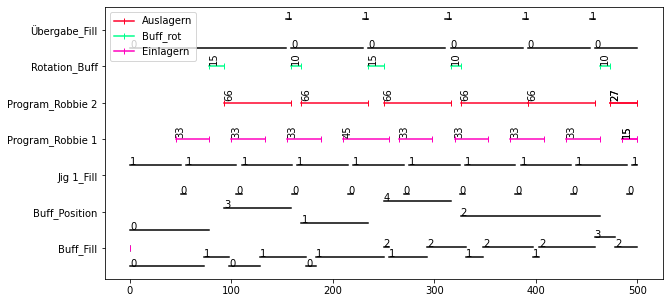

In [10]:
sim.core.plotHistory()

In [11]:
data

,action,who,start,end,duration,y
0,1,Jig 1_Fill,0,50,50,0
1,0,Jig 1_Fill,50,55,5,0
2,1,Jig 1_Fill,55,105,50,0
3,0,Jig 1_Fill,105,110,5,0
4,1,Jig 1_Fill,110,160,50,0
...,...,...,...,...,...,...
67,Auslagern,Program_Robbie 2,250,316,66,6
68,Auslagern,Program_Robbie 2,326,392,66,6
69,Auslagern,Program_Robbie 2,392,458,66,6
70,Auslagern,Program_Robbie 2,473,500,27,6
